### 12.4 파아토치로 신경망 모델 만들기

In [27]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

In [44]:
#X_train = np.arange(10, dtype='float32').reshape(( 10,1))
X_train = np.arange(10, dtype='float32')

In [45]:
print(X_train)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [46]:
X_train = np.arange(10, dtype='float32')

In [47]:
print(X_train)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [48]:
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,
                    6.3, 6.6, 7.4, 8.0,
                    9.0], dtype='float32')


In [49]:
print(y_train)

[1.  1.3 3.1 2.  5.  6.3 6.6 7.4 8.  9. ]


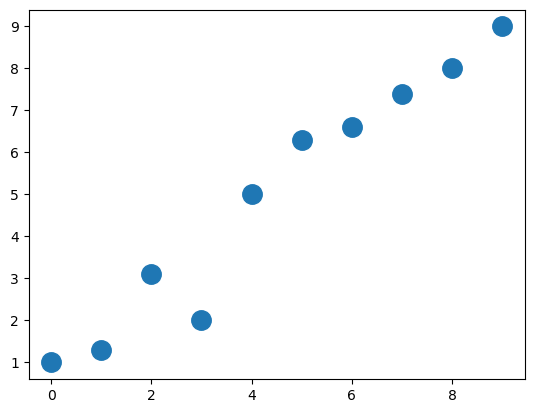

In [50]:
plt.plot(X_train, y_train, 'o', markersize=14)

In [53]:
X_train.dtype

dtype('float32')

In [90]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

In [54]:
X_train_norm.dtype

torch.float32

In [55]:
y_train = torch.from_numpy(y_train).float()

In [56]:
y_train.dtype

torch.float32

In [59]:
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [60]:
train_dl

In [62]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
    return xb @ weight + bias

In [64]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [66]:
learning_rate = 0.001
num_epochs = 2000
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'에포크{epoch} 손실 {loss.item():.4f}')

에포크0 손실 0.0094
에포크10 손실 0.0015
에포크20 손실 0.1757
에포크30 손실 0.6127
에포크40 손실 0.2652
에포크50 손실 0.2687
에포크60 손실 0.4760
에포크70 손실 1.9154
에포크80 손실 0.0017
에포크90 손실 0.0021
에포크100 손실 0.0003
에포크110 손실 0.4558
에포크120 손실 0.2806
에포크130 손실 0.4520
에포크140 손실 0.4506
에포크150 손실 1.9511
에포크160 손실 0.0384
에포크170 손실 0.0168
에포크180 손실 0.2833
에포크190 손실 0.2835
에포크200 손실 0.0000
에포크210 손실 0.2853
에포크220 손실 0.0395
에포크230 손실 0.2850
에포크240 손실 0.0175
에포크250 손실 0.1601
에포크260 손실 0.5385
에포크270 손실 0.0044
에포크280 손실 0.0177
에포크290 손실 0.0000
에포크300 손실 0.1601
에포크310 손실 0.2846
에포크320 손실 0.0044
에포크330 손실 0.5379
에포크340 손실 0.0177
에포크350 손실 0.0400
에포크360 손실 0.5379
에포크370 손실 0.0000
에포크380 손실 0.0000
에포크390 손실 1.9599
에포크400 손실 0.5378
에포크410 손실 1.9599
에포크420 손실 1.9600
에포크430 손실 0.0000
에포크440 손실 0.0044
에포크450 손실 0.0400
에포크460 손실 0.0400
에포크470 손실 0.2844
에포크480 손실 0.4445
에포크490 손실 1.9600
에포크500 손실 0.0178
에포크510 손실 0.2845
에포크520 손실 0.0000
에포크530 손실 0.1600
에포크540 손실 0.0178
에포크550 손실 1.9600
에포크560 손실 0.0000
에포크570 손실 0.0000
에포크580 손실 0.2845
에포크590 손

In [67]:
print('최종 파라미터:', weight.item(), bias.item())

최종 파라미터: 2.6807901859283447 4.799988269805908


In [82]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)

In [83]:
X_test.shape

(100, 1)

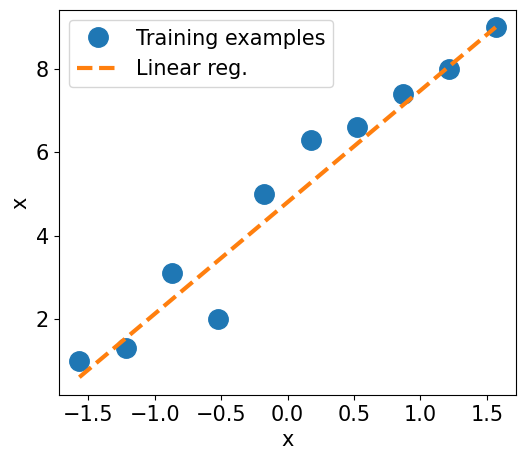

In [84]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=14)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('x', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [85]:
print(model(x_batch))

tensor([6.2000], grad_fn=<AddBackward0>)


In [93]:
import torch.nn as nn
import torch 
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1

model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [94]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. 예측을 생성
        pred = model(x_batch)
        # 2. 손실을 계산
        loss = loss_fn(pred, y_batch)
        #  3. calcuate gradient
        loss.backward()
        # 4. parameter update using gradient
        optimizer.step()
        # 5. set gradient to 0
        optimizer.zero_grad()
    
    if epoch % log_epochs ==0 :
        print(f'에포크 {epoch} 손실 {loss.item():.4f}')

에포크 0 손실 34.7879
에포크 10 손실 0.2323
에포크 20 손실 3.4483
에포크 30 손실 17.1924
에포크 40 손실 10.4620
에포크 50 손실 7.0775
에포크 60 손실 4.7988
에포크 70 손실 3.2624
에포크 80 손실 2.6037
에포크 90 손실 0.6802
에포크 100 손실 1.0477
에포크 110 손실 2.0054
에포크 120 손실 0.7515
에포크 130 손실 0.0763
에포크 140 손실 0.3386
에포크 150 손실 0.4928
에포크 160 손실 2.0653
에포크 170 손실 0.1740
에포크 180 손실 2.1841
에포크 190 손실 0.0001
에포크 200 손실 0.0409
에포크 210 손실 0.0320
에포크 220 손실 0.8497
에포크 230 손실 0.0745
에포크 240 손실 2.3583
에포크 250 손실 0.0745
에포크 260 손실 0.0625
에포크 270 손실 0.2469
에포크 280 손실 0.1367
에포크 290 손실 0.0091
에포크 300 손실 0.7619
에포크 310 손실 0.7578
에포크 320 손실 0.0657
에포크 330 손실 0.0070
에포크 340 손실 0.0500
에포크 350 손실 0.1390
에포크 360 손실 0.2391
에포크 370 손실 0.7456
에포크 380 손실 0.7447
에포크 390 손실 0.7440
에포크 400 손실 0.0742
에포크 410 손실 2.4326
에포크 420 손실 0.0717
에포크 430 손실 0.0476
에포크 440 손실 0.0475
에포크 450 손실 2.4334
에포크 460 손실 0.0744
에포크 470 손실 0.1394
에포크 480 손실 0.0446
에포크 490 손실 0.0447
에포크 500 손실 0.0473
에포크 510 손실 0.0473
에포크 520 손실 0.0744
에포크 530 손실 0.0726
에포크 540 손실 0.2524
에포크 550 손실 0.7409


In [95]:
print('최종 파라미터', model.weight.item(), model.bias.item())

최종 파라미터 2.7066781520843506 4.969934940338135
